# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Sampling in Python</h1>

Sampling in Python is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population. In this Sampling in Python course, you’ll discover when to use sampling and how to perform common types of sampling—from simple random sampling to more complex methods like stratified and cluster sampling. Using real-world datasets, including coffee ratings, Spotify songs, and employee attrition, you’ll learn to estimate population statistics and quantify uncertainty in your estimates by generating sampling distributions and bootstrap distributions.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Introduction to Sampling](#1)
    - Sampling and point estimates
    - Convenience sampling
    - Pseudo-random number generation

* [2. Sampling Methods](#2) 
    - Simple random and systematic sampling
    - Stratified and weighted random sampling
    - Cluster sampling
    - Comparing sampling methods
    
* [3. Sampling Distributions](#3)
    - Relative error of point estimates
    - Creating a sampling distribution
    - Approximate sampling distributions
    - Standard errors and the Central Limit Theorem
    
* [4. Bootstrap Distributions](#4)
    - Introduction to bootstrapping
    - Comparing sampling and bootstrap distributions
    - Confidence intervals

## Explore Datasets

Use the DataFrames imported in the first cell to explore the data and practice your skills!

In [30]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Importing the course arrays
attrition = pd.read_feather("datasets/attrition.feather")
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
coffee = pd.read_feather("datasets/coffee_ratings_full.feather")

In [31]:
attrition.head().T

,0,1,2,3,4
Age,21,19,18,18,18
Attrition,0.0,1.0,1.0,0.0,1.0
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,391,528,230,812,1306
Department,Research_Development,Sales,Research_Development,Sales,Sales
DistanceFromHome,15,22,3,10,5
Education,College,Below_College,Bachelor,Bachelor,Bachelor
EducationField,Life_Sciences,Marketing,Life_Sciences,Medical,Marketing
EnvironmentSatisfaction,High,Very_High,High,Very_High,Medium
Gender,Male,Male,Male,Female,Male


In [32]:
spotify_population.head().T

,0,1,2,3,4
acousticness,0.972,0.321,0.00659,0.0039,0.122
artists,['David Bauer'],['Etta James'],['Quasimoto'],['Millencolin'],['Steve Chou']
danceability,0.567,0.821,0.706,0.368,0.501
duration_ms,313293.0,360240.0,202507.0,173360.0,344200.0
duration_minutes,5.22155,6.004,3.375117,2.889333,5.736667
energy,0.227,0.418,0.602,0.977,0.511
explicit,0.0,0.0,1.0,0.0,0.0
id,0w0D8H1ubRerCXHWYJkinO,4JVeqfE2tpi7Pv63LJZtPh,5pxtdhLAi0RTh1gNqhGMNA,3jRsoe4Vkxa4BMYqGHX8L0,4mronxcllhfyhBRqyZi8kU
instrumentalness,0.601,0.000372,0.000138,0.0,0.0
key,10.0,9.0,11.0,11.0,7.0


In [33]:
coffee.head().T

,0,1,2,3,4
total_cup_points,90.58,89.92,89.75,89.0,88.83
species,Arabica,Arabica,Arabica,Arabica,Arabica
owner,metad plc,metad plc,grounds for health admin,yidnekachew dabessa,metad plc
country_of_origin,Ethiopia,Ethiopia,Guatemala,Ethiopia,Ethiopia
farm_name,metad plc,metad plc,"san marcos barrancas ""san cristobal cuch",yidnekachew dabessa coffee plantation,metad plc
lot_number,None,None,None,None,None
mill,metad plc,metad plc,None,wolensu,metad plc
ico_number,2014/2015,2014/2015,None,None,2014/2015
company,metad agricultural developmet plc,metad agricultural developmet plc,None,yidnekachew debessa coffee plantation,metad agricultural developmet plc
altitude,1950-2200,1950-2200,1600 - 1800 m,1800-2200,1950-2200


In [34]:
print(attrition.shape)
print(spotify_population.shape)
print(coffee.shape)

(1470, 31)
(41656, 20)
(1338, 43)


## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Introduction to Sampling</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Learn what sampling is and why it is so powerful. You’ll also learn about the problems caused by convenience sampling and the differences between true randomness and pseudo-randomness.

### 1 01 Sampling and point estimates

1. Sampling and point estimates

Hi! Welcome to the course! I’m James, and I’ll be your host as we delve into the world of sampling data with Python. To start, let’s look at what sampling is and why it might be useful.

2. Estimating the population of France

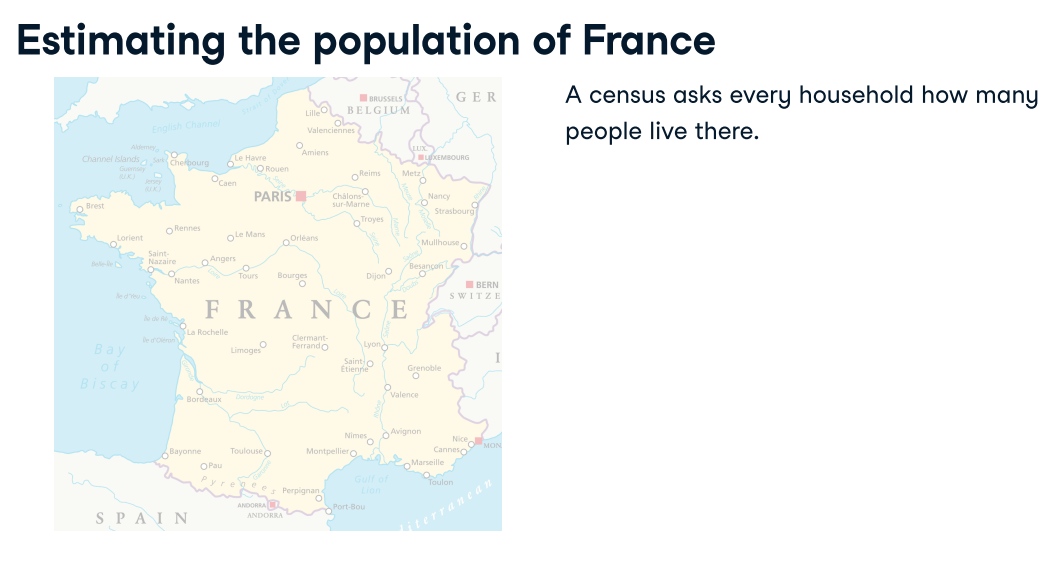

Let's consider the problem of counting how many people live in France. The standard approach is to take a census. This means contacting every household and asking how many people live there.

3. There are lots of people in France

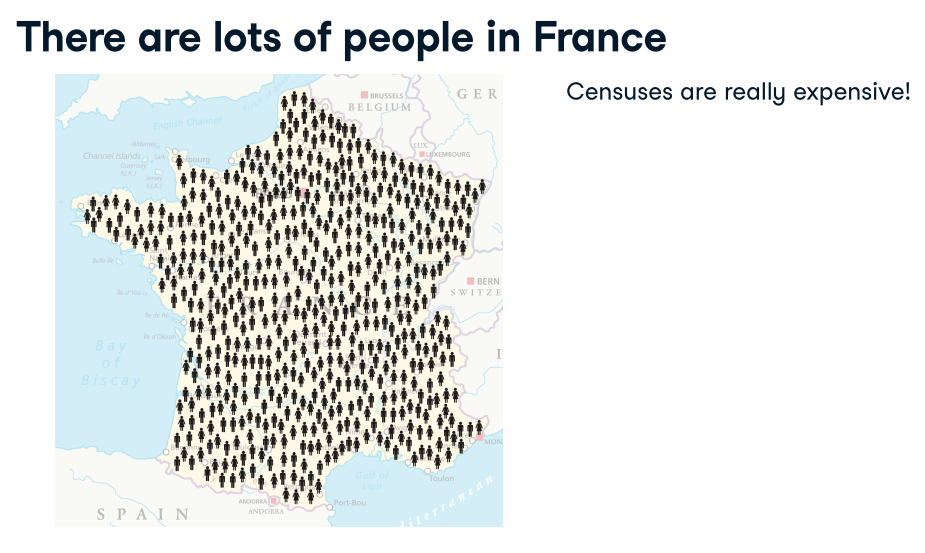

Since there are millions of people in France, this is a really expensive process. Even with modern data collection technology, most countries will only conduct a census every five or ten years due to the cost.

4. Sampling households

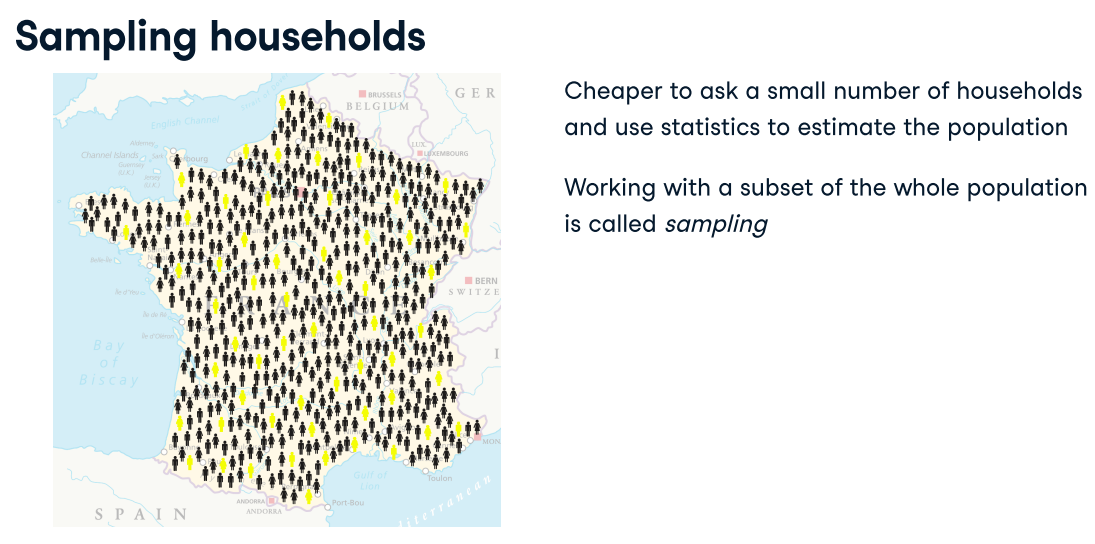

In 1786, Pierre-Simon Laplace realized you could estimate the population with less effort. Rather than asking every household who lived there, he asked a small number of households and used statistics to estimate the number of people in the whole population. This technique of working with a subset of the whole population is called sampling.

5. Population vs. sample

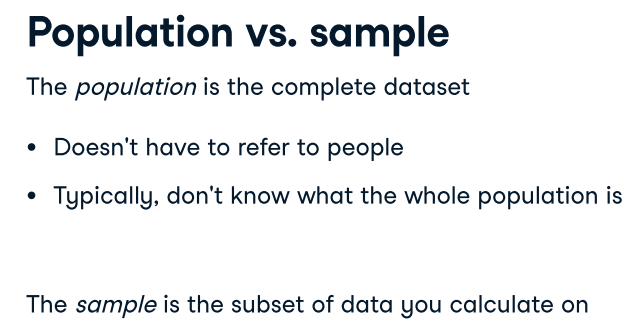

Two definitions are important for this course. The population is the complete set of data that we are interested in. The previous example involved the literal population of France, but in statistics, it doesn't have to refer to people. One thing to bear in mind is that there is usually no equivalent of the census, so typically, we won't know what the whole population is like - more on this in a moment. The sample is the subset of data that we are working with.

6. Coffee rating dataset

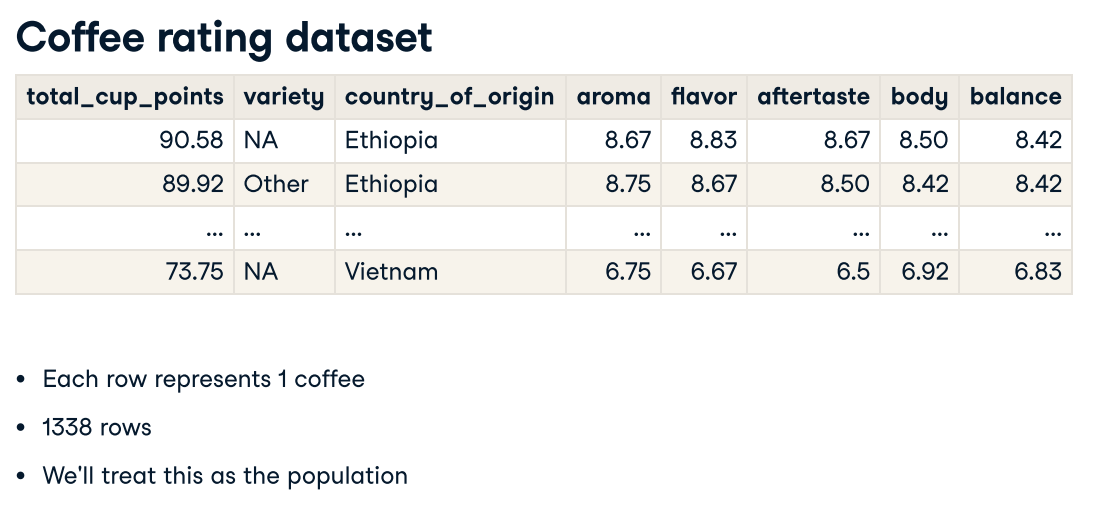

Here's a dataset of professional ratings of coffees. Each row corresponds to one coffee, and there are thirteen hundred and thirty-eight rows in the dataset. The coffee is given a score from zero to one hundred, which is stored in the total_cup_points column. Other columns contain contextual information like the variety and country of origin and scores between zero and ten for attributes of the coffee such as aroma and body. These scores are averaged across all the reviewers for that particular coffee. It doesn't contain every coffee in the world, so we don't know exactly what the population of coffees is. However, there are enough here that we can think of it as our population of interest.

7. Points vs. flavor: population

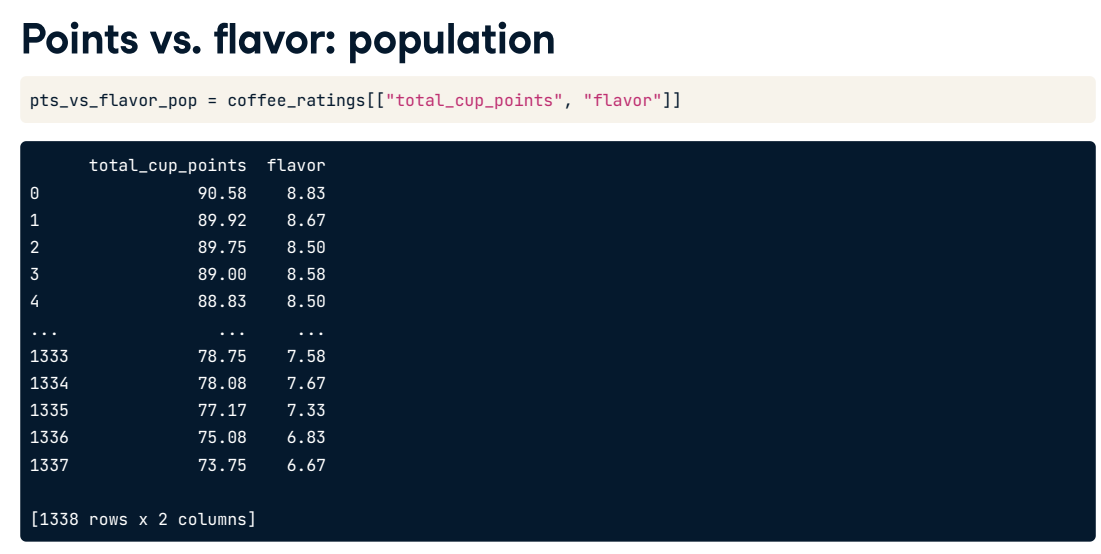

Let's consider the relationship between cup points and flavor by selecting those two columns. This dataset contains all thirteen hundred and thirty-eight rows from the original dataset.

8. Points vs. flavor: 10 row sample

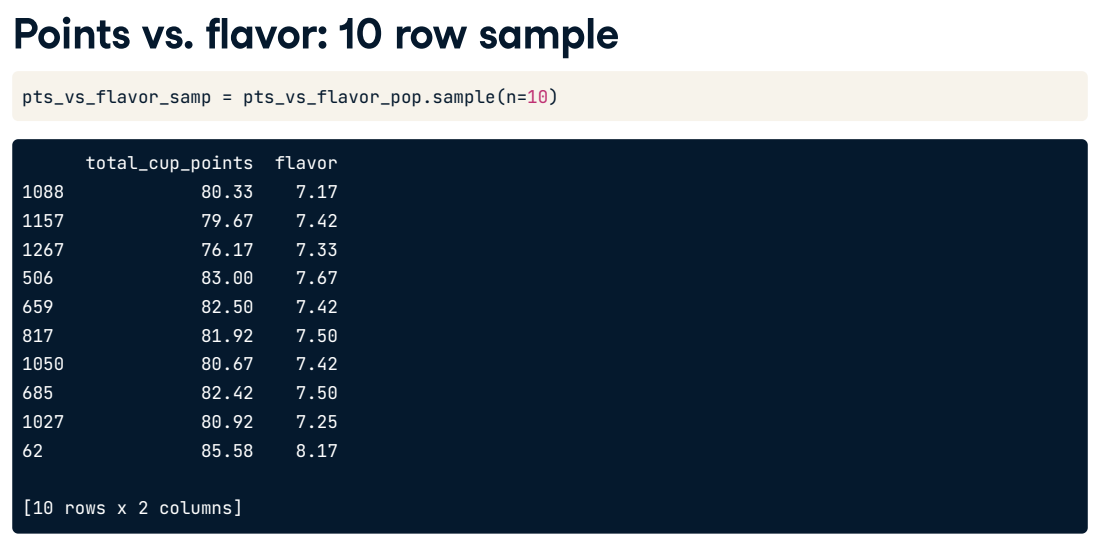

The pandas dot-sample method returns a random subset of rows. Setting n to ten means ten random rows are returned. By default, rows from the original dataset can't appear in the sample dataset multiple times, so we are guaranteed to have ten unique rows in our sample.

9. Python sampling for Series

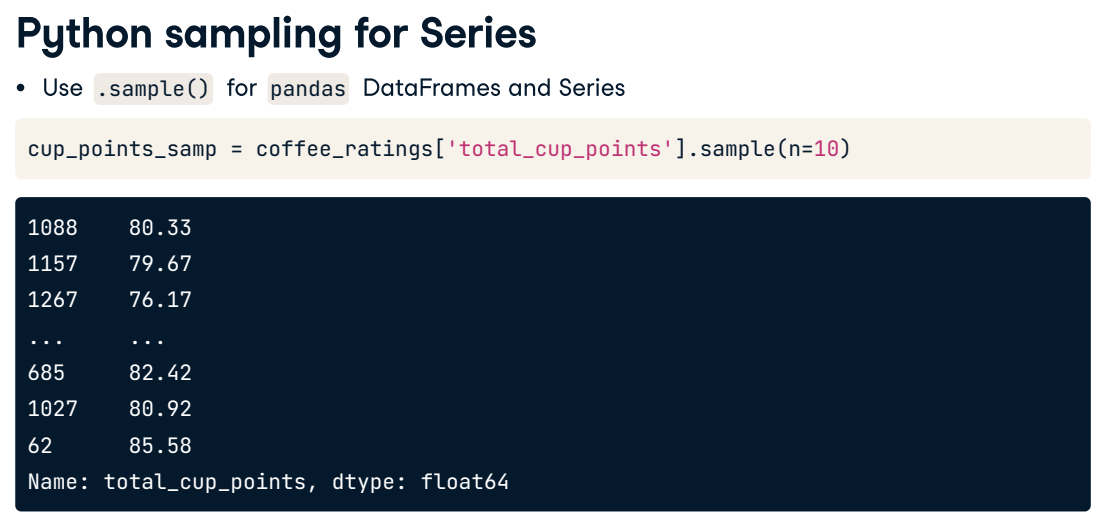

The dot-sample method also works on pandas Series. Here, using square-bracket subsetting retrieves the total_cup_points column as a Series, and the n argument specifies how many random values to return.

10. Population parameters & point estimates

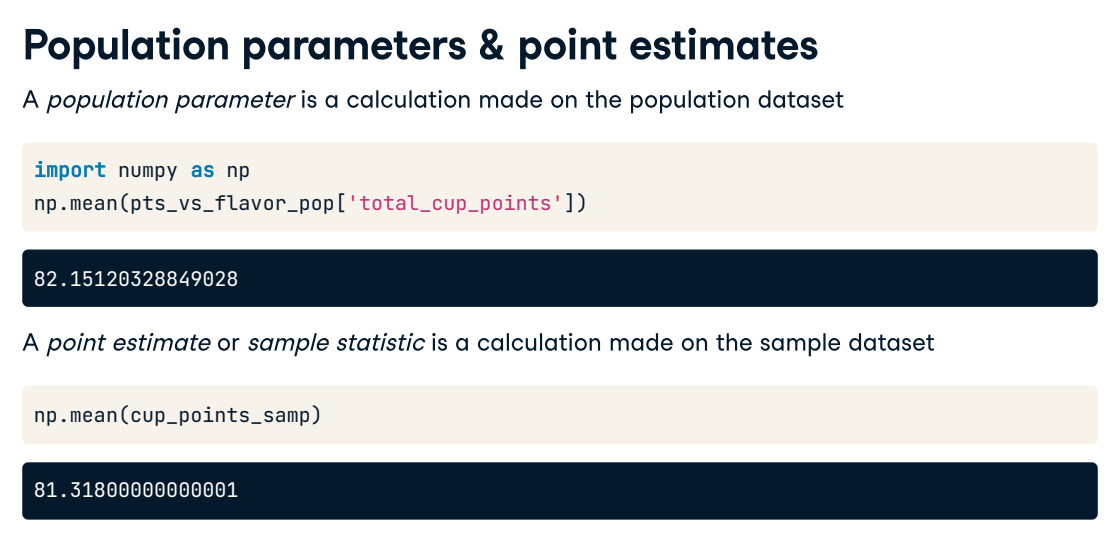

A population parameter is a calculation made on the population dataset. We aren't limited to counting values either; here, we calculate the mean of the cup points using NumPy. By contrast, a point estimate, or sample statistic, is a calculation based on the sample dataset. Here, the mean of the total cup points is calculated on the sample. Notice that the means are very similar but not identical.

11. Point estimates with pandas

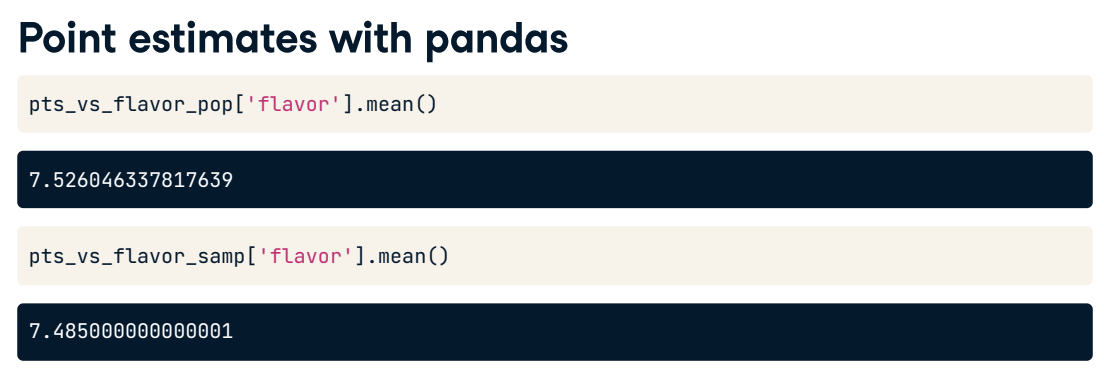

Working with pandas can be easier than working with NumPy. These mean calculations can be performed using the dot-mean pandas method.

12. Let's practice!

Let's start sampling!

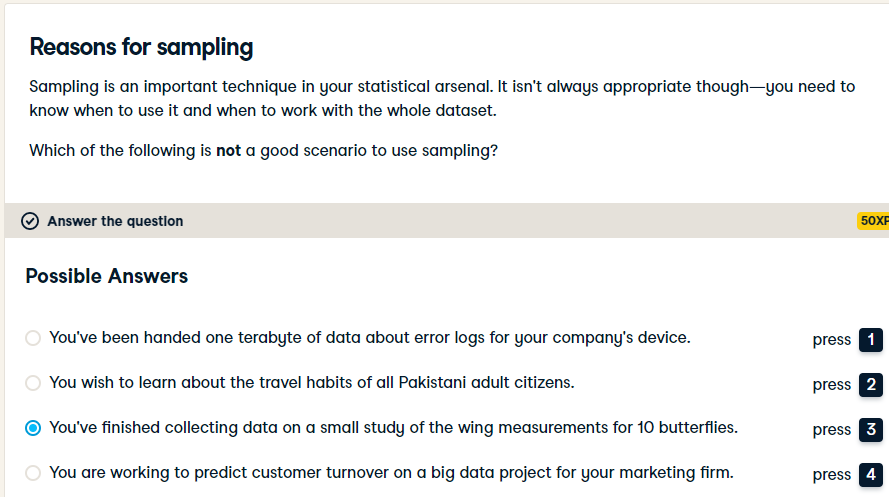

Commendations on your justifications for not sampling! Ten butterflies is a small dataset, so sampling isn't useful here.

**Exercise**

**Simple sampling with pandas**

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

spotify_population is available and pandas is loaded as pd.

**Instructions**

- Sample 1000 rows from spotify_population, assigning to spotify_sample.
- Calculate the mean duration in minutes from spotify_sample using pandas.

In [35]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(1000)

# Print the sample
# print(spotify_sample)
spotify_sample.head().T

,23093,11021,34975,21256,27849
acousticness,0.671,0.00193,0.0849,0.00101,0.212
artists,['Alberto Y Roberto'],['Eminem'],['The Deli'],['The Killers'],['The Doobie Brothers']
danceability,0.792,0.671,0.838,0.356,0.661
duration_ms,227760.0,340267.0,187828.0,222587.0,206520.0
duration_minutes,3.796,5.671117,3.130467,3.709783,3.442
energy,0.638,0.813,0.364,0.924,0.743
explicit,0.0,1.0,0.0,0.0,0.0
id,1vm8h3zjLV66Cmaf8y9DWb,217jPzlbFDCAPoOARhfUdH,6ugrRFZUNIpLiqhLUgC7ix,7oK9VyNzrYvRFo7nQEYkWN,4feNlb6HlpBrW36SsXoUfh
instrumentalness,0.0,0.000002,0.981,0.0,0.000002
key,8.0,5.0,7.0,1.0,4.0


In [36]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
# print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140899896
3.9404424999999996


Powerful point estimating! Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.

**Exercise**

**Simple sampling and calculating with NumPy**

You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

spotify_population is available and numpy is loaded as np.

**Instructions**

- Subset the loudness column from spotify_population to create the pandas Series, loudness_pop.
- Sample loudness_pop to get 100 random values, assigning to loudness_samp.
----------
- Calculate the mean of loudness_pop using numpy.
- Calculate the mean of loudness_samp using numpy.

In [37]:
# Subset the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(100)

# Print the sample
print(loudness_samp)

40363    -4.857
26208    -4.289
39651    -2.859
31119    -3.046
6539     -5.428
          ...  
16876   -11.007
20206    -3.505
5973     -4.518
35375    -8.274
13657    -7.247
Name: loudness, Length: 100, dtype: float64


In [38]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353918
-8.084829999999998


Devious means! Again, notice that the calculated value (the mean) is close but not identical in each case.

### 1 02 Convenience sampling

1. Convenience sampling

The point estimates you calculated in the previous exercises were very close to the population parameters that they were based on, but is this always the case?

2. The Literary Digest election prediction

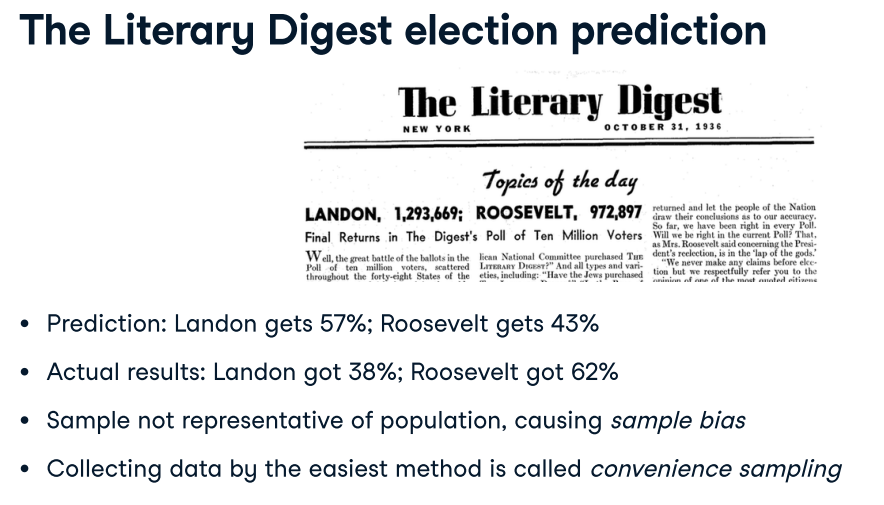

In 1936, a newspaper called The Literary Digest ran an extensive poll to try to predict the next US presidential election. They phoned ten million voters and had over two million responses. About one-point-three million people said they would vote for Landon, and just under one million people said they would vote for Roosevelt. That is, Landon was predicted to get fifty-seven percent of the vote, and Roosevelt was predicted to get forty-three percent of the vote. Since the sample size was so large, it was presumed that this poll would be very accurate. However, in the election, Roosevelt won by a landslide with sixty-two percent of the vote. So what went wrong? Well, in 1936, telephones were a luxury, so the only people who had been contacted by The Literary Digest were relatively rich. The sample of voters was not representative of the whole population of voters, and so the poll suffered from sample bias. The data was collected by the easiest method, in this case, telephoning people. This is called convenience sampling and is often prone to sample bias. Before sampling, we need to think about our data collection process to avoid biased results.

3. Finding the mean age of French people

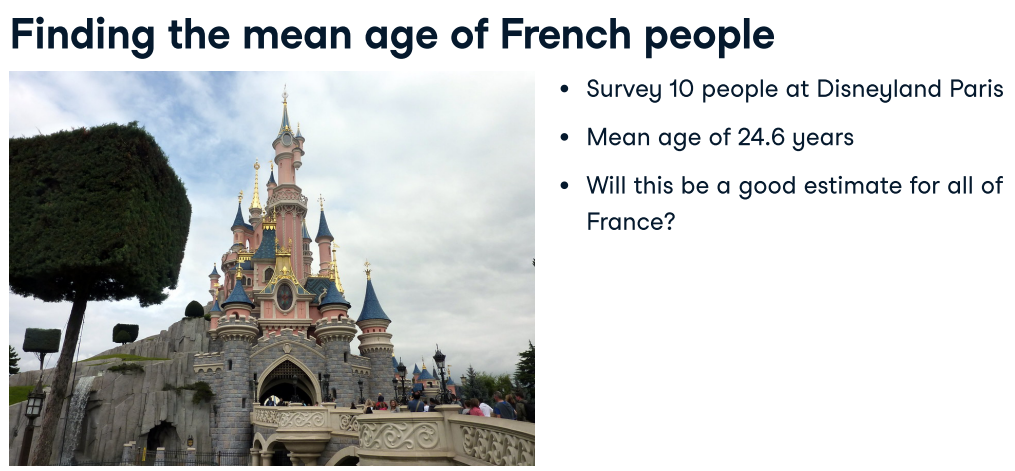

Let's look at another example. While on vacation at Disneyland Paris, you start wondering about the mean age of French people. To get an answer, you ask ten people stood nearby about their ages. Their mean age is twenty-four-point-six years old. Do you think this will be a good estimate of the mean age of all French citizens?

4. How accurate was the survey?

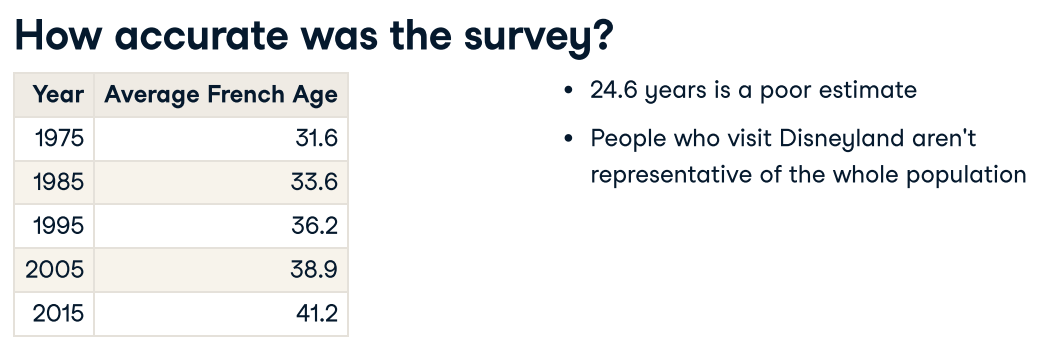

On the left, you can see mean ages taken from the French census. Notice that the population has been gradually getting older as birth rates decrease and life expectancy increases. In 2015, the mean age was over forty, so our estimate of twenty-four-point-six is way off. The problem is that the family-friendly fun at Disneyland means that the sample ages weren't representative of the general population. There are generally more eight-year-olds than eighty-year-olds riding rollercoasters.

5. Convenience sampling coffee ratings

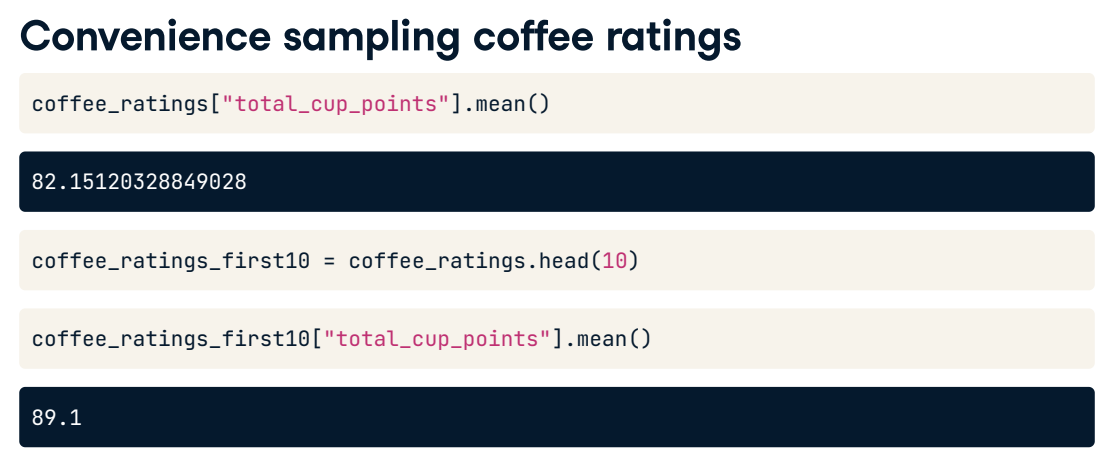

Let's return to the coffee ratings dataset and look at the mean cup points population parameter. The mean is about eighty-two. One form of convenience sampling would be to take the first ten rows, rather than the random rows we saw in the previous video. We can take the first 10 rows with the pandas head method. The mean cup points from this sample is higher at eighty-nine. The discrepancy suggests that coffees with higher cup points appear near the start of the dataset. Again, the convenience sample isn't representative of the whole population.

6. Visualizing selection bias

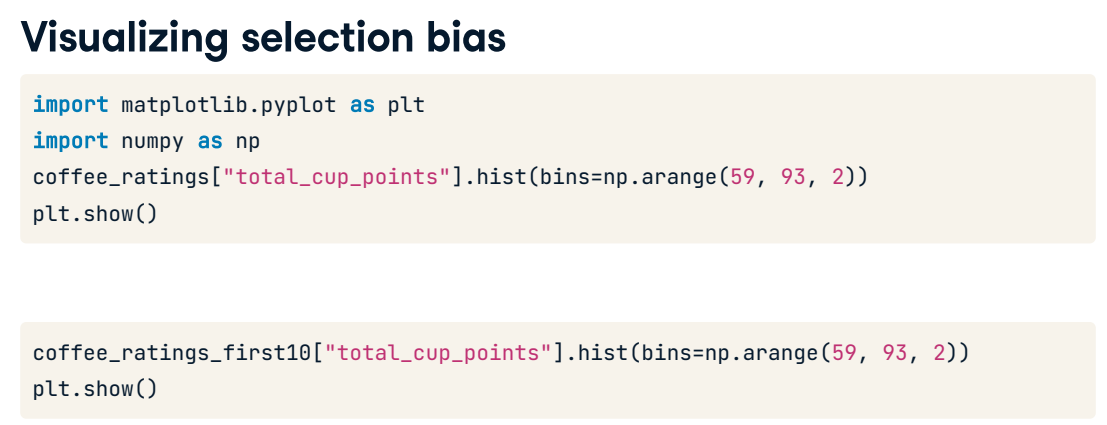

Histograms are a great way to visualize the selection bias. We can create a histogram of the total cup points from the population, which contains values ranging from around 59 to around 91. The numpy-dot-arange function can be used to create bins of width 2 from 59 to 91. Recall that the stop value in numpy-dot-arange is exclusive, so we specify 93, not 91. Here's the same code to generate a histogram for the convenience sample.

7. Distribution of a population and of a convenience sample

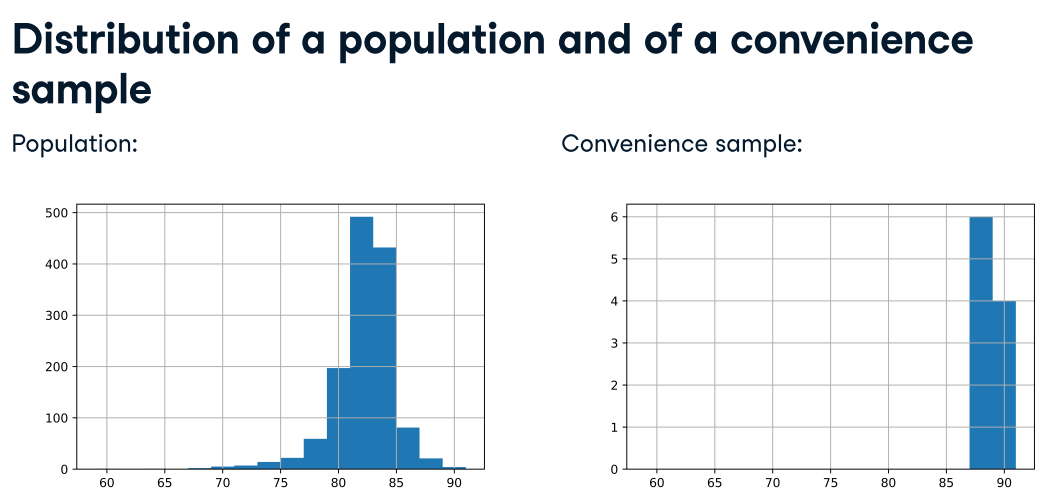

Comparing the two histograms, it is clear that the distribution of the sample is not the same as the population: all of the sample values are on the right-hand side of the plot.

8. Visualizing selection bias for a random sample

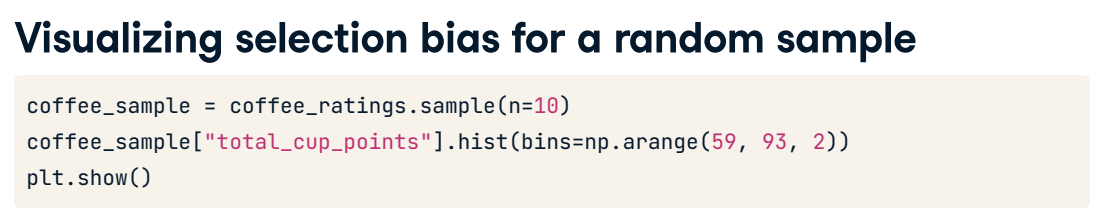

This time, we'll compare the total_cup_points distribution of the population with a random sample of 10 coffees.

9. Distribution of a population and of a simple random sample

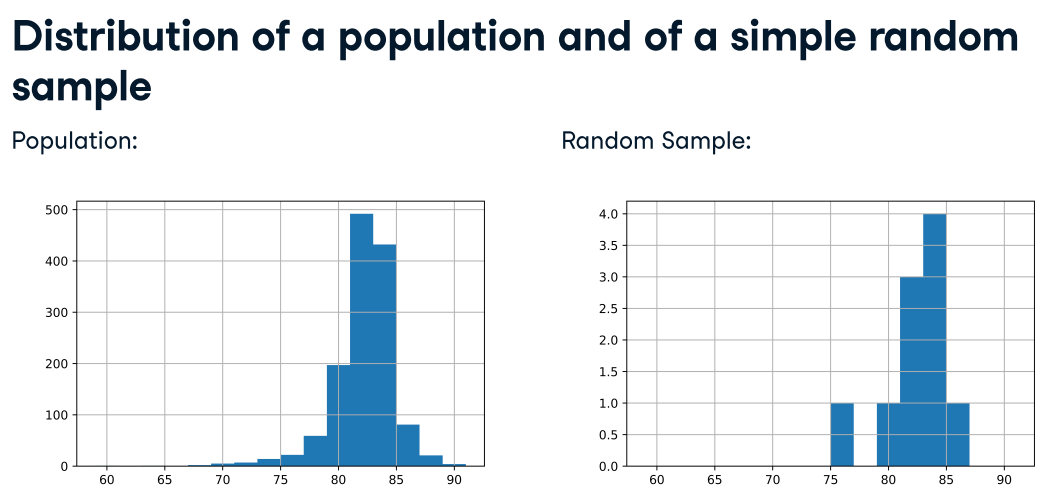

Notice how the shape of the distributions is more closely aligned when random sampling is used.

10. Let's practice!

Let's plot some histograms!

**Exercise**

**Are findings from the sample generalizable?**

You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

spotify_population and spotify_mysterious_sample are available; pandas as pd, matplotlib.pyplot as plt, and numpy as np are loaded.

**Instructions**

- Plot a histogram of the acousticness from spotify_population with bins of width 0.01 from 0 to 1 using pandas .hist().
- Update the histogram code to use the spotify_mysterious_sample dataset.

In [41]:
spotify_population.head().T

,0,1,2,3,4
acousticness,0.972,0.321,0.00659,0.0039,0.122
artists,['David Bauer'],['Etta James'],['Quasimoto'],['Millencolin'],['Steve Chou']
danceability,0.567,0.821,0.706,0.368,0.501
duration_ms,313293.0,360240.0,202507.0,173360.0,344200.0
duration_minutes,5.22155,6.004,3.375117,2.889333,5.736667
energy,0.227,0.418,0.602,0.977,0.511
explicit,0.0,0.0,1.0,0.0,0.0
id,0w0D8H1ubRerCXHWYJkinO,4JVeqfE2tpi7Pv63LJZtPh,5pxtdhLAi0RTh1gNqhGMNA,3jRsoe4Vkxa4BMYqGHX8L0,4mronxcllhfyhBRqyZi8kU
instrumentalness,0.601,0.000372,0.000138,0.0,0.0
key,10.0,9.0,11.0,11.0,7.0


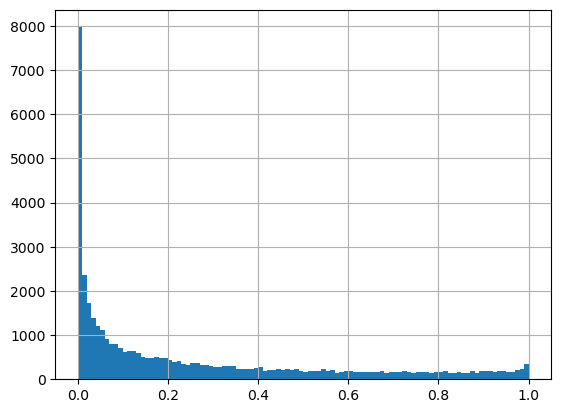

In [45]:
# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins = np.arange(0, 1.01, 0.01))
plt.show()

In [68]:
spotify_mysterious_sample = spotify_population.sample(100)

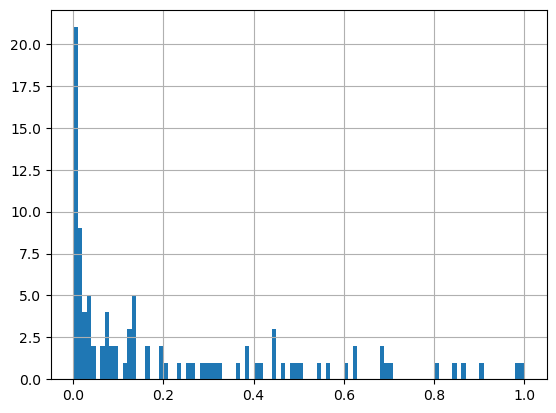

In [69]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

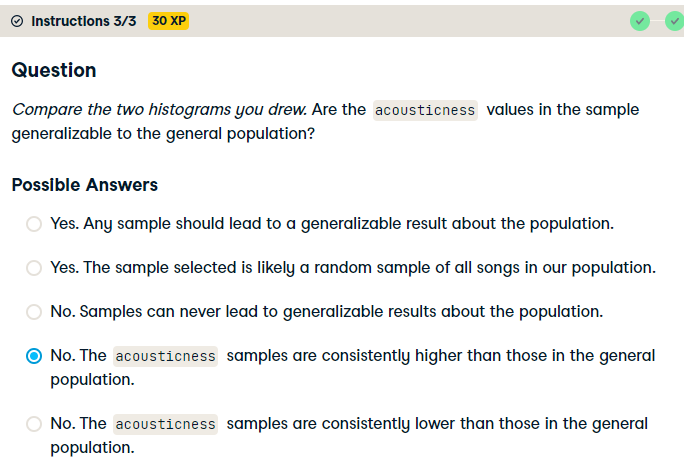

Ace acouticness analysis! The acousticness values in the sample are all greater than 0.95, whereas they range from 0 to 1 in the whole population.

**Exercise**

**Are these findings generalizable?**

Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

spotify_population and spotify_mysterious_sample2 are available; pandas, matplotlib.pyplot, and numpy are loaded using their standard aliases.

**Instructions**

- Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15 using pandas .hist().
- Update the histogram code to use the spotify_mysterious_sample2 dataset.


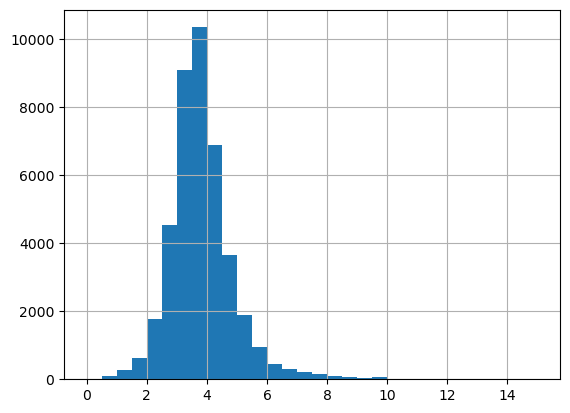

In [57]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0,15.5,0.5))
plt.show()

In [66]:
spotify_mysterious_sample2 = spotify_population.sample(100)

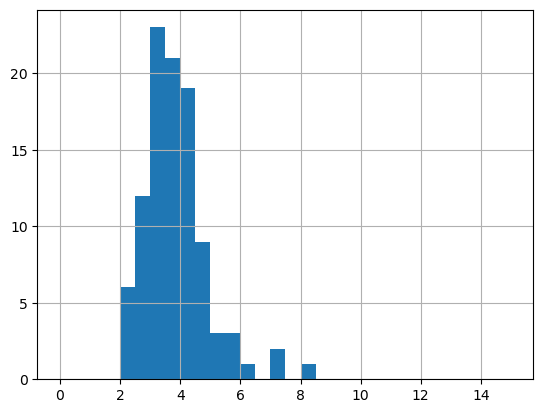

In [67]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

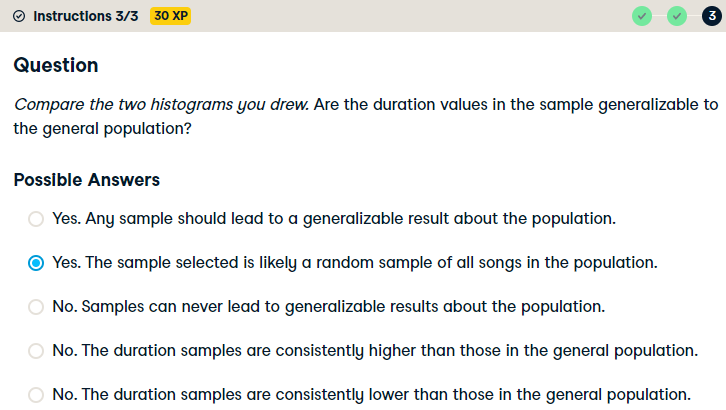

Delightful duration distribution analysis! The duration values in the sample show a similar distribution to those in the whole population, so the results are generalizable.

### 1 03 Pseudo-random number generation

1. Pseudo-random number generation

You previously saw how to use a random sample to get results similar to those in the population. But how does a computer actually do this random sampling?

2. What does random mean?

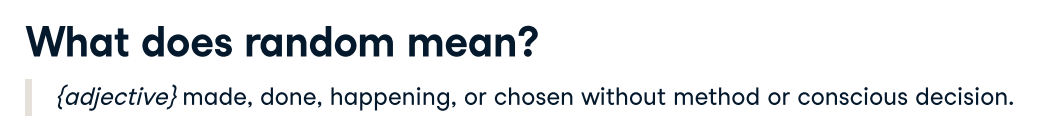

There are several meanings of random in English. This definition from Oxford Languages is the most interesting for us. If we want to choose data points at random from a population, we shouldn't be able to predict which data points would be selected ahead of time in some systematic way.

*1 Oxford Languages

3. True random numbers

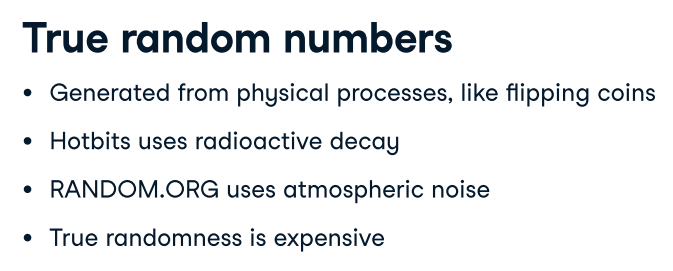

To generate truly random numbers, we typically have to use a physical process like flipping coins or rolling dice. The Hotbits service generates numbers from radioactive decay, and RANDOM-dot-ORG generates numbers from atmospheric noise, which are radio signals generated by lightning. Unfortunately, these processes are fairly slow and expensive for generating random numbers.

*1 https://www.fourmilab.ch/hotbits
*2 https://www.random.org

4. Pseudo-random number generation

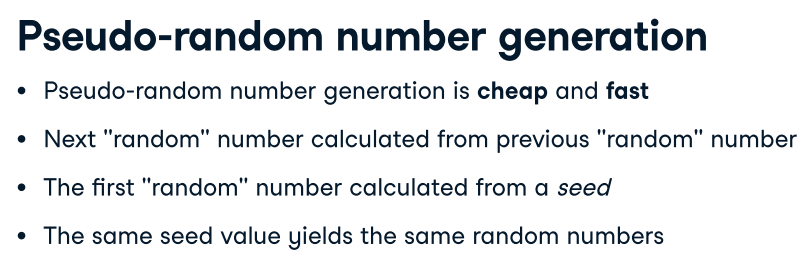

For most use cases, pseudo-random number generation is better since it is cheap and fast. Pseudo-random means that although each value appears to be random, it is actually calculated from the previous random number. Since you have to start the calculations somewhere, the first random number is calculated from what is known as a seed value. The word random is in quotes to emphasize that this process isn't really random. If we start from a particular seed value, all future numbers will be the same.

5. Pseudo-random number generation example

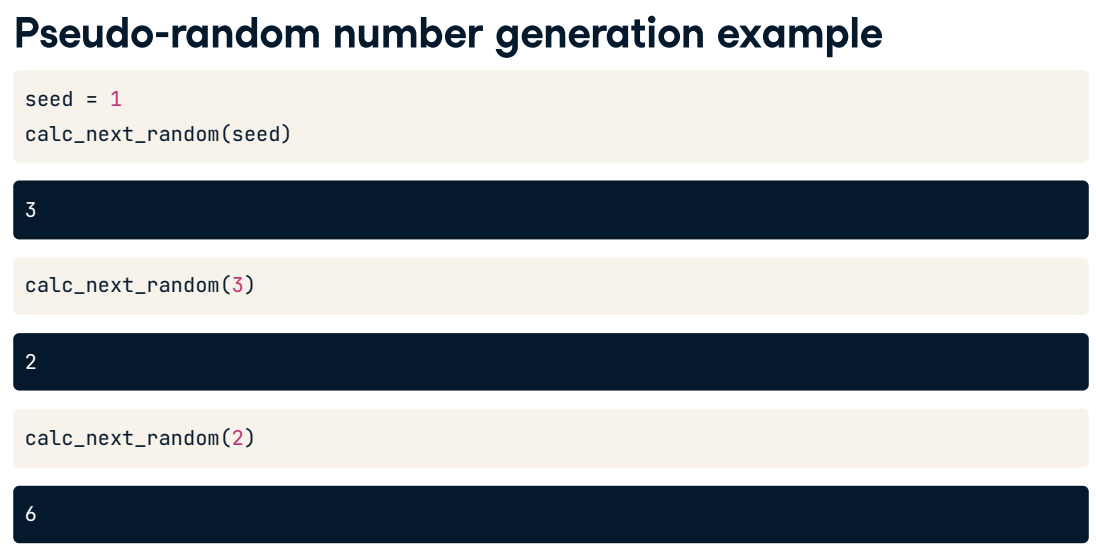

For example, suppose we have a function to generate pseudo-random values called calc_next_random. To begin, we pick a seed number, in this case, one. calc_next_random does some calculations and returns three. We then feed three into calc_next_random, and it does the same set of calculations and returns two. And if we can keep feeding in the last number, it will return something apparently random. Although the process is deterministic, the trick to a random number generator is to make it look like the values are random.

6. Random number generating functions

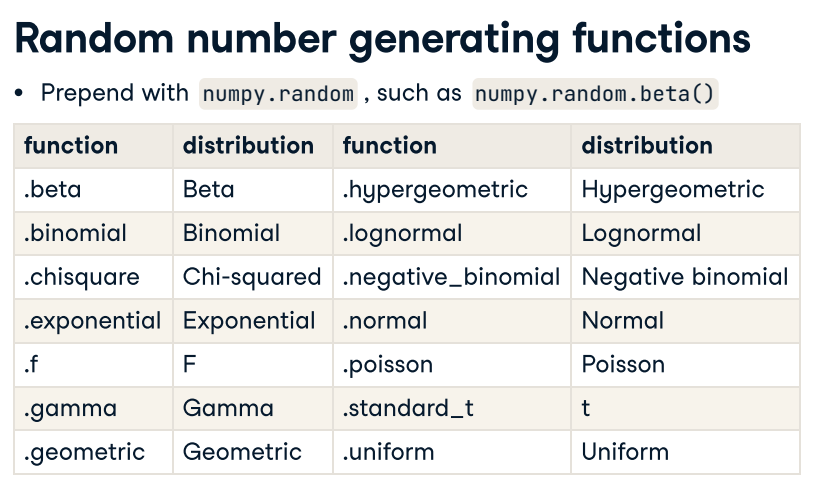

NumPy has many functions for generating random numbers from statistical distributions. To use each of these, make sure to prepend each function name with numpy-dot-random or np-dot-random. Some of them, like dot-uniform and dot-normal, may be familiar. Others have more niche applications.

7. Visualizing random numbers

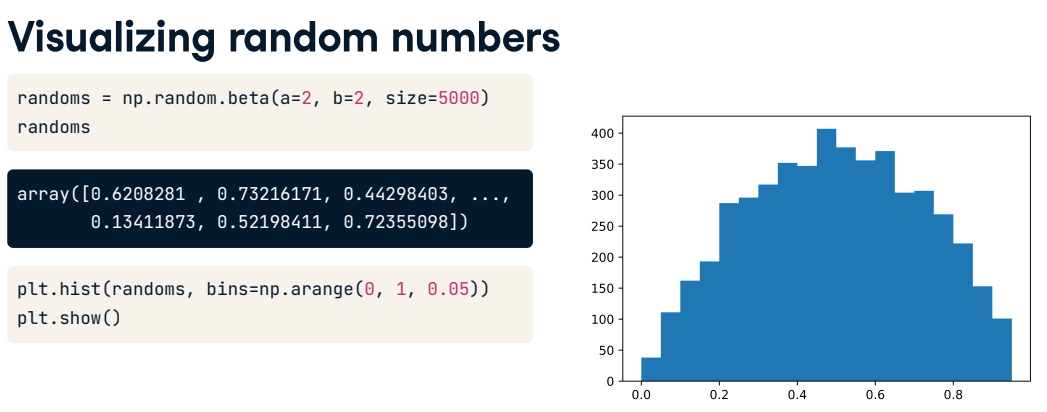

Let's generate some pseudo-random numbers. The first arguments to each random number function specify distribution parameters. The size argument specifies how many numbers to generate, in this case, five thousand. We've chosen the beta distribution, and its parameters are named a and b. These random numbers come from a continuous distribution, so a great way to visualize them is with a histogram. Here, because the numbers were generated from the beta distribution, all the values are between zero and one.

8. Random numbers seeds

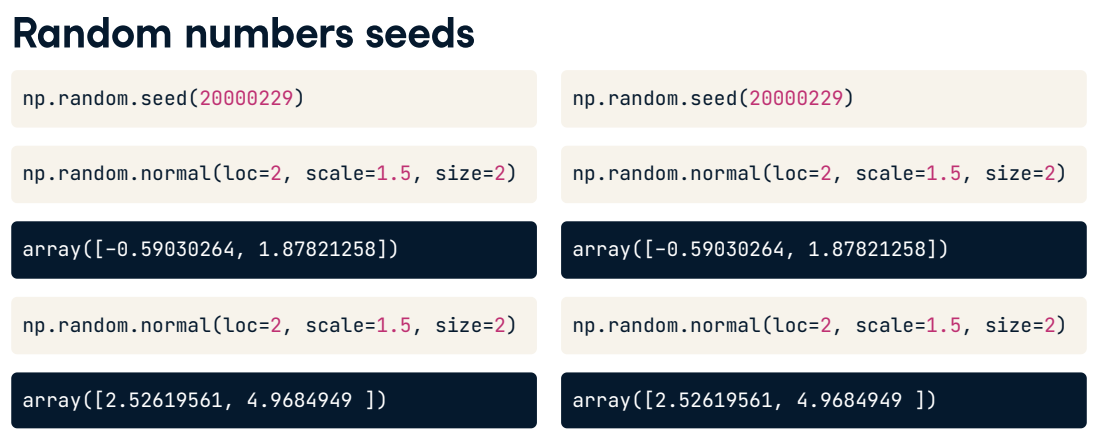

To set a random seed with NumPy, we use the dot-random-dot-seed method. random-dot-seed takes an integer for the seed number, which can be any number you like. dot-normal generates pseudo-random numbers from the normal distribution. The loc and scale arguments set the mean and standard deviation of the distribution, and the size argument determines how many random numbers from that distribution will be returned. If we call dot-normal a second time, we get two different random numbers. If we reset the seed by calling random-dot-seed with the same seed number, then call dot-normal again, we get the same numbers as before. This makes our code reproducible.

9. Using a different seed

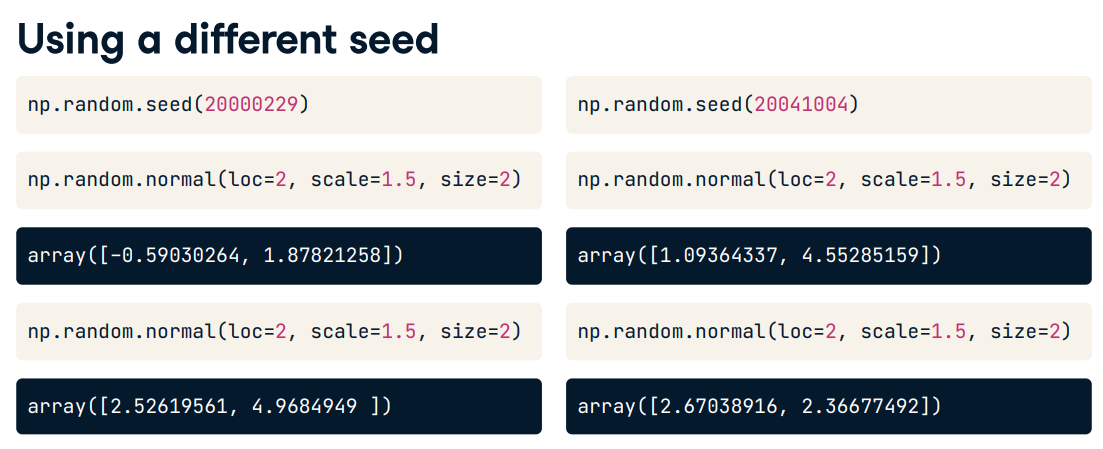

Now let's try a different seed. This time, calling dot-normal generates different numbers.

10. Let's practice!

Let's sow some random seeds!

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Sampling Methods</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

It’s time to get hands-on and perform the four random sampling methods in Python: simple, systematic, stratified, and cluster.

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. Sampling Distributions</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Let’s test your sampling. In this chapter, you’ll discover how to quantify the accuracy of sample statistics using relative errors, and measure variation in your estimates by generating sampling distributions.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Bootstrap Distributions</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

You’ll get to grips with resampling to perform bootstrapping and estimate variation in an unknown population. You’ll learn the difference between sampling distributions and bootstrap distributions using resampling.